<a href="https://colab.research.google.com/github/sjg02122/Deep_learning_study/blob/master/Back_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation Implementation

> Refernce : Deep_learning_from_scratch(Chapter 5. Backpropagation)

> Summary
1.   Example for Practice forward, backward implementation
2.   Make the activation Function and Loss function!
3. Example Neural Network for backpropagation










In [0]:
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [7]:
cd gdrive/My Drive/Deep_learning_from_scratch

/content/gdrive/My Drive/Deep_learning_from_scratch


# 1.   Example for Practice forward, backward implementation


In [0]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None
  def forward(self,x,y):
    self.x =x
    self.y =y
    out = x*y
    return out
  def backward(self,dout):
    dx = dout * self.y
    dy = dout * self.x
    return dx,dy

In [0]:
class AddLayer:
  def __init__(self):
    pass
  
  def forward(self,x,y):
    self.x = x
    self.y = y
    out = x+y
    return out
  def backward(self,dout):
    dx = dout*1
    dy = dout*1

    return dx,dy

In [10]:
##Example for MulLayer

apple = 100
apple_num =2
orange = 150
orange_num = 3
tax =1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

#Forward Propagation
apple_price = mul_apple_layer.forward(apple,apple_num)
orange_price = mul_orange_layer.forward(orange,orange_num)
all_price = add_apple_orange_layer.forward(apple_price,orange_price)
total_price = mul_tax_layer.forward(all_price,tax)

#Back Propagation
d_price =1
d_all_price,d_tax = mul_tax_layer.backward(d_price)
d_apple,d_orange = add_apple_orange_layer.backward(d_all_price)
d_apple_price,d_apple_num = mul_apple_layer.backward(d_apple)
d_orange_price,d_orange_num = mul_orange_layer.backward(d_orange)

print(total_price)
print(d_apple_num,d_apple_price,d_orange_num,d_orange_price,d_tax)

715.0000000000001
110.00000000000001 2.2 165.0 3.3000000000000003 650


# 2.   Make the activation Function and Loss function!


In [0]:
class ReLu:
  def __init__(self):
    self.mask= None

  def forward(self,x):
    self.mask = (x<=0)
    out = x.copy()
    out[self.mask]=0
    return out
  
  def backward(self,dout):
    dout[self.mask]=0
    dx = dout
    return dx  

In [0]:
class Sigmoid:
  def __init__(self):
    self.out =None
  def forward(self,x):
    out = 1 / (1+np.exp(-x))
    self.out = out
    return out
  def backward(self,dout):
    dx = dout * (1.0-self.out )* self.out
    return dx

In [0]:
class Affine:
  def __init__(slef,W,b):
    self.W = W
    self.b = b
    self.x =None
    self.dW = None
    self.db = None
  
  def forward(self,x):
    self.x =x
    out = np.dot(x,self.W)+self.b
    return out
  
  def backward(self,dout):
    dx = np.dot(dout,self.W.T)
    self.dW = np.dot(self.x.T,dout)
    self.db = np.sum(dout,axis=0)
    return dx

In [0]:
def softmax(x):
  exp_x = np.exp(x)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x

  return y


def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y= y.reshape(1,y.size)

  batch_size = y.shape[0]
  return -np.sum(t*np.log(y+1e-7)) / bathc_size

In [0]:
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None #손실
    self.y = None #softmax 출력
    self.t = None #one-hot vector

  def forward(self,x,t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y,self.t)
    return self.loss
  
  def backward(self,dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y -self.t) / batch_size
    return dx


# 3. Example Neural Network for backpropagation

In [0]:
import sys
import os
from collections import OrderedDict

from common.layers import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

In [0]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [18]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
W1:3.7279768655415436e-10
b1:2.3335860412859264e-09
W2:4.776683389685183e-09
b2:1.3964043710651407e-07


In [21]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch = 0
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        epoch +=1
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('Epoch', epoch, ':  ',train_acc,'\t', test_acc)

Epoch 1 :   0.09418333333333333 	 0.0992
Epoch 2 :   0.89895 	 0.9032
Epoch 3 :   0.9250333333333334 	 0.928
Epoch 4 :   0.9342333333333334 	 0.9355
Epoch 5 :   0.9420666666666667 	 0.9396
Epoch 6 :   0.9512333333333334 	 0.948
Epoch 7 :   0.9546833333333333 	 0.9537
Epoch 8 :   0.9594666666666667 	 0.9586
Epoch 9 :   0.9619333333333333 	 0.9584
Epoch 10 :   0.9648333333333333 	 0.9612
Epoch 11 :   0.9683 	 0.9633
Epoch 12 :   0.96975 	 0.9628
Epoch 13 :   0.97275 	 0.9649
Epoch 14 :   0.97435 	 0.9659
Epoch 15 :   0.9763166666666667 	 0.9671
Epoch 16 :   0.9772 	 0.9679
Epoch 17 :   0.9787666666666667 	 0.9676


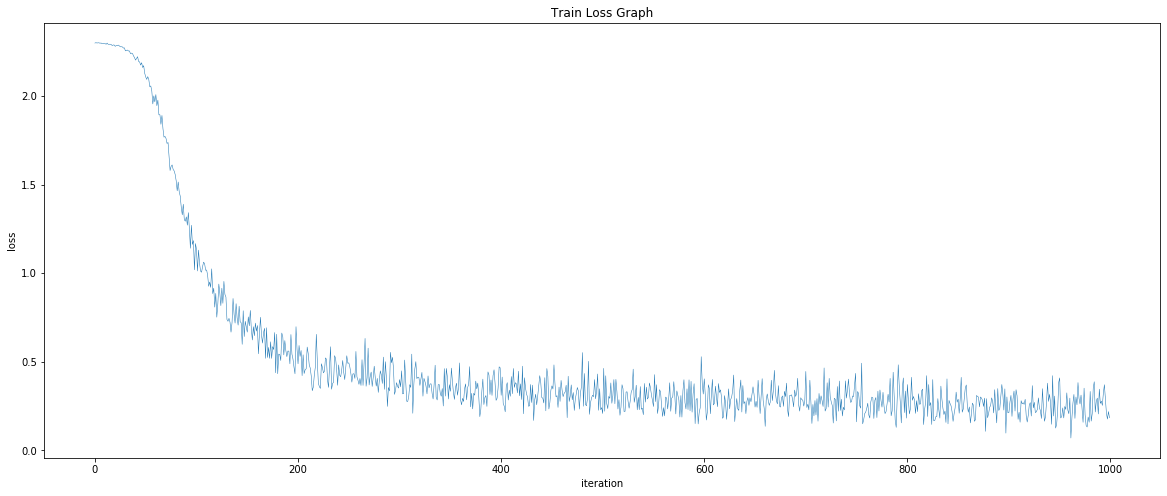

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(train_loss_list[:1000], linewidth=0.5)
plt.title('Train Loss Graph')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

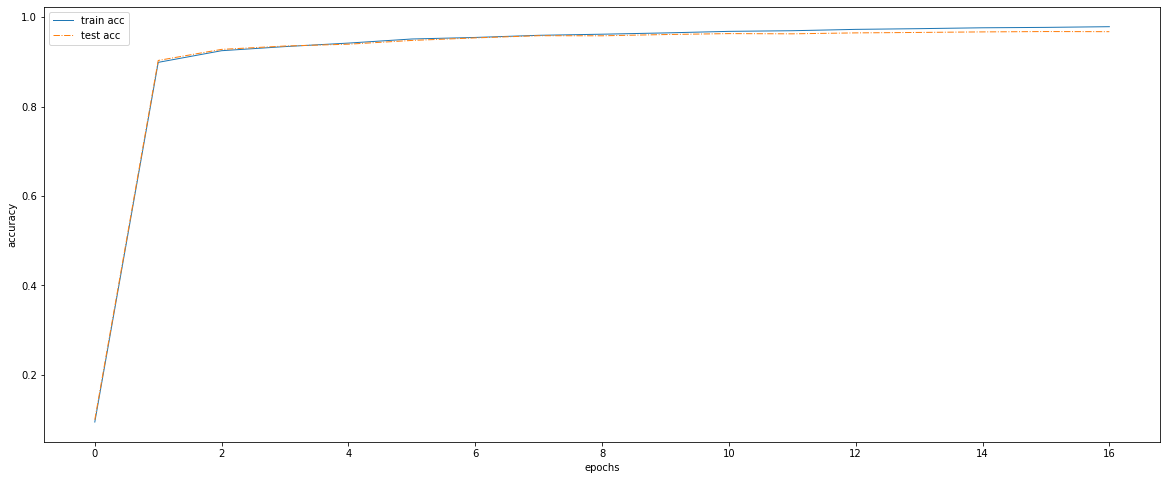

In [23]:
plt.figure(figsize=(20,8))
plt.plot(train_acc_list, linewidth=1)
plt.plot(test_acc_list, '-.' ,linewidth=1)
plt.legend(['train acc', 'test acc'], loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()